In [42]:
#Sentiment analysis on stocks from reddit using PRAW(Python Reddit API Wrapper)
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
from IPython import display
from pprint import pprint
import matplotlib.pyplot as plt
import praw

#While running this code, uncomment 5 lines of code below and paste your Reddit developer account details inside client_id, client_secret, user_agent.
#reddit = praw.Reddit(
    #client_id=" ",
    #client_secret=" ",
    #user_agent=" ",
#)

In [43]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sanchit.DESKTOP-
[nltk_data]     LV5F3SO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sanchit.DESKTOP-
[nltk_data]     LV5F3SO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
sns.set(style = 'darkgrid', context = 'talk', palette = 'Dark2')

In [45]:
headlines = set()
for submission in reddit.subreddit('Stocks').new(limit=None):
    headlines.add(submission.title)
print(len(headlines))

818


In [46]:
#Sentiment analysis using SentimentIntensityAnalyzer
sia = SIA()
results = []
for line in headlines:
    scores = sia.polarity_scores(line)
    scores['headlines'] = line
    results.append(scores)
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headlines
0,0.179,0.643,0.179,0.0000,How will inflate your debt away work in a coun...
1,0.000,1.000,0.000,0.0000,Any investors here looking at European markets ?
2,0.000,1.000,0.000,0.0000,Samsung posts worse-than-expected guidance for...
3,0.000,0.643,0.357,0.6124,The defense Sector - Can those Earnings be sus...
4,0.000,1.000,0.000,0.0000,Is $SMR facing badluck or it will eventually b...


In [47]:
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1
df.head()

,neg,neu,pos,compound,headlines,label
0,0.179,0.643,0.179,0.0000,How will inflate your debt away work in a coun...,0
1,0.000,1.000,0.000,0.0000,Any investors here looking at European markets ?,0
2,0.000,1.000,0.000,0.0000,Samsung posts worse-than-expected guidance for...,0
3,0.000,0.643,0.357,0.6124,The defense Sector - Can those Earnings be sus...,1
4,0.000,1.000,0.000,0.0000,Is $SMR facing badluck or it will eventually b...,0


In [48]:
print("Positive Headlines:\n")
pprint(list(df[df['label'] == 1].headlines)[:5], width = 100)

print("\nNegative Headlines:\n")
pprint(list(df[df['label'] == -1].headlines)[:5], width = 100)

Positive Headlines:

['The defense Sector - Can those Earnings be sustained in peace times. ',
 "McDonald's shares fall after CDC says E. coli outbreak linked to Quarter Pounders",
 'How has Walgreens not cut their dividend yet?',
 'Apollo and Workday rally on news they’ll join the S&P 500',
 'Why does IBM get no love ? Follow Up.']

Negative Headlines:

['$VKTX - The sleeping GIANT in weight loss drugs (Catalyst = Oral drug data at Obesity Week on '
 'Nov 3, 2024)',
 'SoundHound AI Stock Tumbles as Margins Drop ',
 'Anyone else getting nervous about an impending recession?',
 'What I learnt from MSTR frenzy',
 'Adani Group shares nosedive after chairman Gautam Adani charged with fraud in New York']


In [49]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

label
 0    473
 1    239
-1    106
Name: count, dtype: int64
label
 0    57.823961
 1    29.217604
-1    12.958435
Name: proportion, dtype: float64


C:\Users\Sanchit.DESKTOP-LV5F3SO\AppData\Local\Temp\ipykernel_8428\2504184716.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


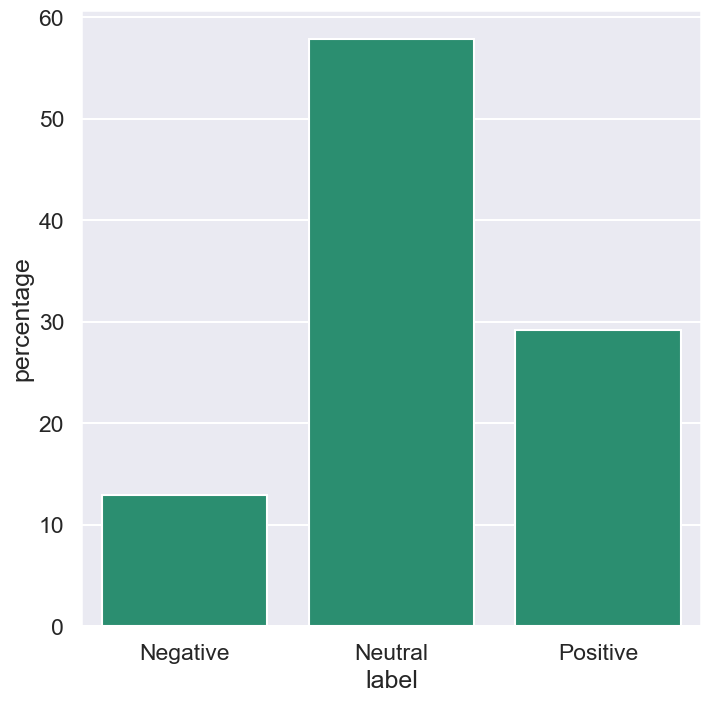

In [55]:
#Bar Plot
fig, ax = plt.subplots(figsize = (8,8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y= counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('percentage')
plt.show()